In [0]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist

from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [11]:
# dataset consists of 1000 samples with 3 clusters and 2 features
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
X

array([[-0.80723584,  2.66946295],
       [ 1.9263585 ,  4.15243012],
       [-1.50016563,  3.10133251],
       ...,
       [ 0.41230223,  0.49159186],
       [-2.53294087,  2.09633244],
       [ 1.10777893,  1.14210712]])

In [12]:
# scatter plot of dataset
plt.scatter(X[:,0], X[:,1])

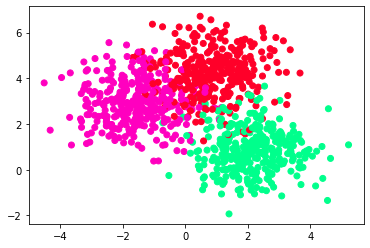

In [13]:
# plot of dataset with different color to each cluster (ground truth)
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')

**Clustering Distance Measures**

The choice of appropriate distance measures is a crucial step in clustering. It defines how the similarity of two elements (x, y) is calculated and the cluster each point is assigned to. The classical methods for distance measures are Euclidean and Manhattan distances, which are defined as below:

Euclidean Distance:

![](https://docs.google.com/uc?export=download&id=1vS6r6N_LQS1WA1GcpyNNB9FDMKxOfF4M)


Manhattan Distance:

![](https://docs.google.com/uc?export=download&id=1FpJZ-sGewNvFV7CzrQQah7aGyrWYD6s0)


Here, x and y are two vectors of length n.

**Using k-means to cluster data**

The basic idea behind k-means is to define clusters such that objects within the same cluster are similar as possible, i.e, high intra-class similarity while objects in different clusters are dissimilar as possible, i.e, low inter-class similarity. 



![](https://docs.google.com/uc?export=download&id=1tzojjhx0CDK8mVHjPuhE4KiXeG1eQfRu) 



Here, $x_{i}$ is a data point belonging to the cluster, $C_{k}$, $μ_{k}$ is the mean value of points in each cluster.

Similarly, the total within-cluster variation is defined as:

![](https://docs.google.com/uc?export=download&id=1Zbt9pd_2I-0sdJCpmae5Z9E78LJMO2ax)

Here, k is the cluster number.


**K-means algorithm:**

1. Specify the number of clusters (K) to be created.
2. Select randomly k objects from the data set as the initial cluster centers or means.
3. Assign each observation to their closest centroid, based on the Euclidean distance between the object and the centroid.
4. For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the cluster. The centroid of a $K^{th}$ cluster is a vector of length p containing the means of all variables for the observations in the $k^{th}$ cluster; p is the number of variables.
5. Iteratively minimize the total within sum of square. That is, iterate steps 3 and 4 until the cluster assignments stop changing or the maximum number of iterations is reached.

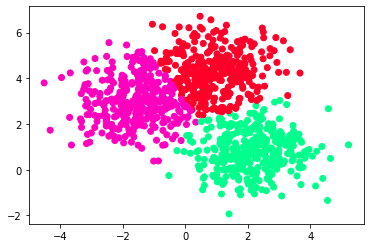

In [14]:
# Using KMeans from sklearn to cluster data
km = KMeans(n_clusters=3, random_state=0).fit(X)
plt.scatter(X[:,0], X[:,1], c=km.labels_, cmap='gist_rainbow')

**Determining the optimal number of clusters:**

1. Elbow method
2. Silhouette method
3. Gap statistic

**1. Elbow method**



Algorithm: 

1. Compute clustering algorithm (e.g., k-means clustering) for different values  of k. 
2. For each k, calculate the total within-cluster sum of square W$(C_{k})$, i.e, 


![](https://docs.google.com/uc?export=download&id=1tzojjhx0CDK8mVHjPuhE4KiXeG1eQfRu) 

3. Plot the curve of W$(C_{k})$ with to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters as the distortion value remains almost constant after the knee point.

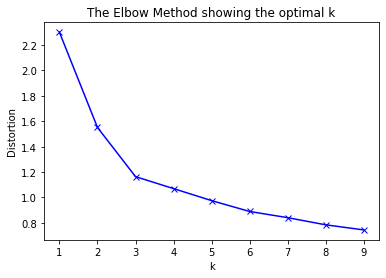

In [15]:
# determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Here, as the curve bends from point 3, it is the optimal number of clusters required.

**2. Silhouette method**

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). [Wikipedia]

The range of the Silhouette coefficient is between +1 and -1. The silhouette value '1' indicates that the clusters are far away from each other which is desirable, the silhouette value '0' indicates the cluster is the same for all the points and '-1' indicates that the clustering is wrong.


**Algorithm:**

1. Create a distance matrix.
2. For each data point, find: 

  2.1 Cohesion 'a' (Intraclass distance)

  2.2 Separation 'b' (Interclass distance)

  2.3 s(silhoutte coefficient) = (b-a)/max(a,b)

In [0]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

In [17]:
# Plot the elbow
K = range(1,10)
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

There is a clear peak at k = 2. Hence, it is optimal.

**3. Gap statistic**

Paper: https://statweb.stanford.edu/~gwalther/gap

Code reference: https://glowingpython.blogspot.com/2019/01/a-visual-introduction-to-gap-statistics.html

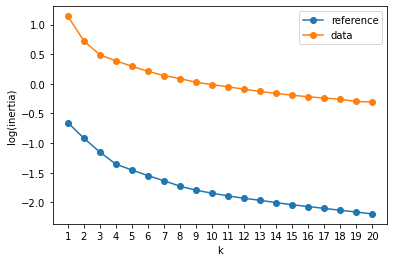

In [18]:
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max, n_references=10):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

k_max = 20
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), X, k_max)


plt.plot(range(1, k_max+1), reference_inertia,
         '-o', label='reference')

plt.plot(range(1, k_max+1), ondata_inertia,
         '-o', label='data')
plt.legend()
plt.xlabel('k')
plt.ylabel('log(inertia)')
plt.xticks(np.arange(1,21,1))
plt.show()

To determine the optimum cluster from gap statistic, we have to check the gap between the plot of reference_inertia and ondata_inertia for each point. Here, the gap between reference inertia and on data inertia is the most at 3. Thus, 3 is the optimum cluster. The gap can be visualized more clearly as:

([<matplotlib.axis.XTick at 0x7f7567aa7a58>,
 <a list of 20 Text major ticklabel objects>)

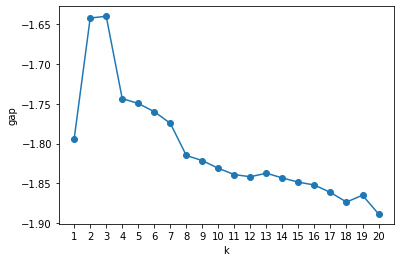

In [19]:
plt.plot(range(1, k_max+1), gap, '-o')
plt.ylabel('gap')
plt.xlabel('k')
plt.xticks(np.arange(1,21,1))

**Bayesian Information Criterion**

Derivation: Calculation of BIC for calculation of X-Means clustering

https://github.com/bobhancock/goxmeans/blob/master/doc/BIC_notes.pdf


In [0]:
# code reference: https://stats.stackexchange.com/questions/90769/using-bic-to-estimate-the-number-of-k-in-kmeans
from sklearn import cluster
from scipy.spatial import distance
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
import numpy as np

def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels)

    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 
             'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)


ks = range(1,10)

# run 9 times kmeans and save each result in the KMeans object
Kmeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(X) for i in ks]

# now run for each cluster the BIC computation
BIC = [compute_bic(kmeansi,X) for kmeansi in Kmeans]

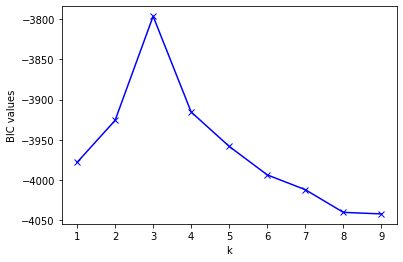

In [21]:
K = range(1,10)
plt.plot(K, BIC, 'bx-')
plt.xlabel('k')
plt.ylabel('BIC values')
plt.show()

Here, clearly, the peak is the k=3.

**Cluster Validity**

There are different methods to check cluster validity: WB-index, DB index, Dunn index and so on.

In [0]:
# Use DB index to check cluster validity
from sklearn.metrics import davies_bouldin_score 
  
db_scores = []

K = range(2,10)
for k in K:
  # K-Means 
  kmeans = KMeans(n_clusters=k, random_state=1).fit(X) 
  
  # we store the cluster labels 
  labels = kmeans.labels_ 
  
  db_scores.append(davies_bouldin_score(X, labels)) 

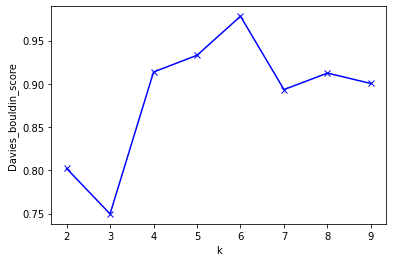

In [23]:
K = range(2,10)
plt.plot(K, db_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies_bouldin_score')
plt.show()

Here, the minimum value is at 3. Thus, 3 is the optimal cluster.